In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from numpy import hstack


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Minor/Minor project datasets/Main_dataset/air_quality_data-4.csv")

In [4]:
df_main=df[["datetime","pm10","pm25","co","no2","o3","so2","aqi"]]

In [5]:
df_main

,datetime,pm10,pm25,co,no2,o3,so2,aqi
0,2023-01-30:18,57.0,42.75,198.0,5.0,87.0,20.0,153
1,2023-01-30:17,54.3,40.75,192.3,5.0,89.0,18.0,153
2,2023-01-30:16,51.7,38.75,186.7,5.0,91.0,16.0,153
3,2023-01-30:15,49.0,36.75,181.0,5.0,93.0,14.0,150
4,2023-01-30:14,46.3,34.75,172.7,3.7,99.3,12.3,137
...,...,...,...,...,...,...,...,...
5427,2023-08-05:22,15.0,12.00,89.0,7.7,37.3,17.7,50
5428,2023-08-05:21,16.0,12.00,92.0,8.0,39.0,18.0,87
5429,2023-08-05:20,18.0,13.50,100.3,9.0,39.0,18.3,104
5430,2023-08-05:19,20.0,15.00,108.7,10.0,39.0,18.7,80


In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  5432 non-null   object 
 1   pm10      5432 non-null   float64
 2   pm25      5432 non-null   float64
 3   co        5432 non-null   float64
 4   no2       5432 non-null   float64
 5   o3        5432 non-null   float64
 6   so2       5432 non-null   float64
 7   aqi       5432 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 339.6+ KB


array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>], dtype=object)

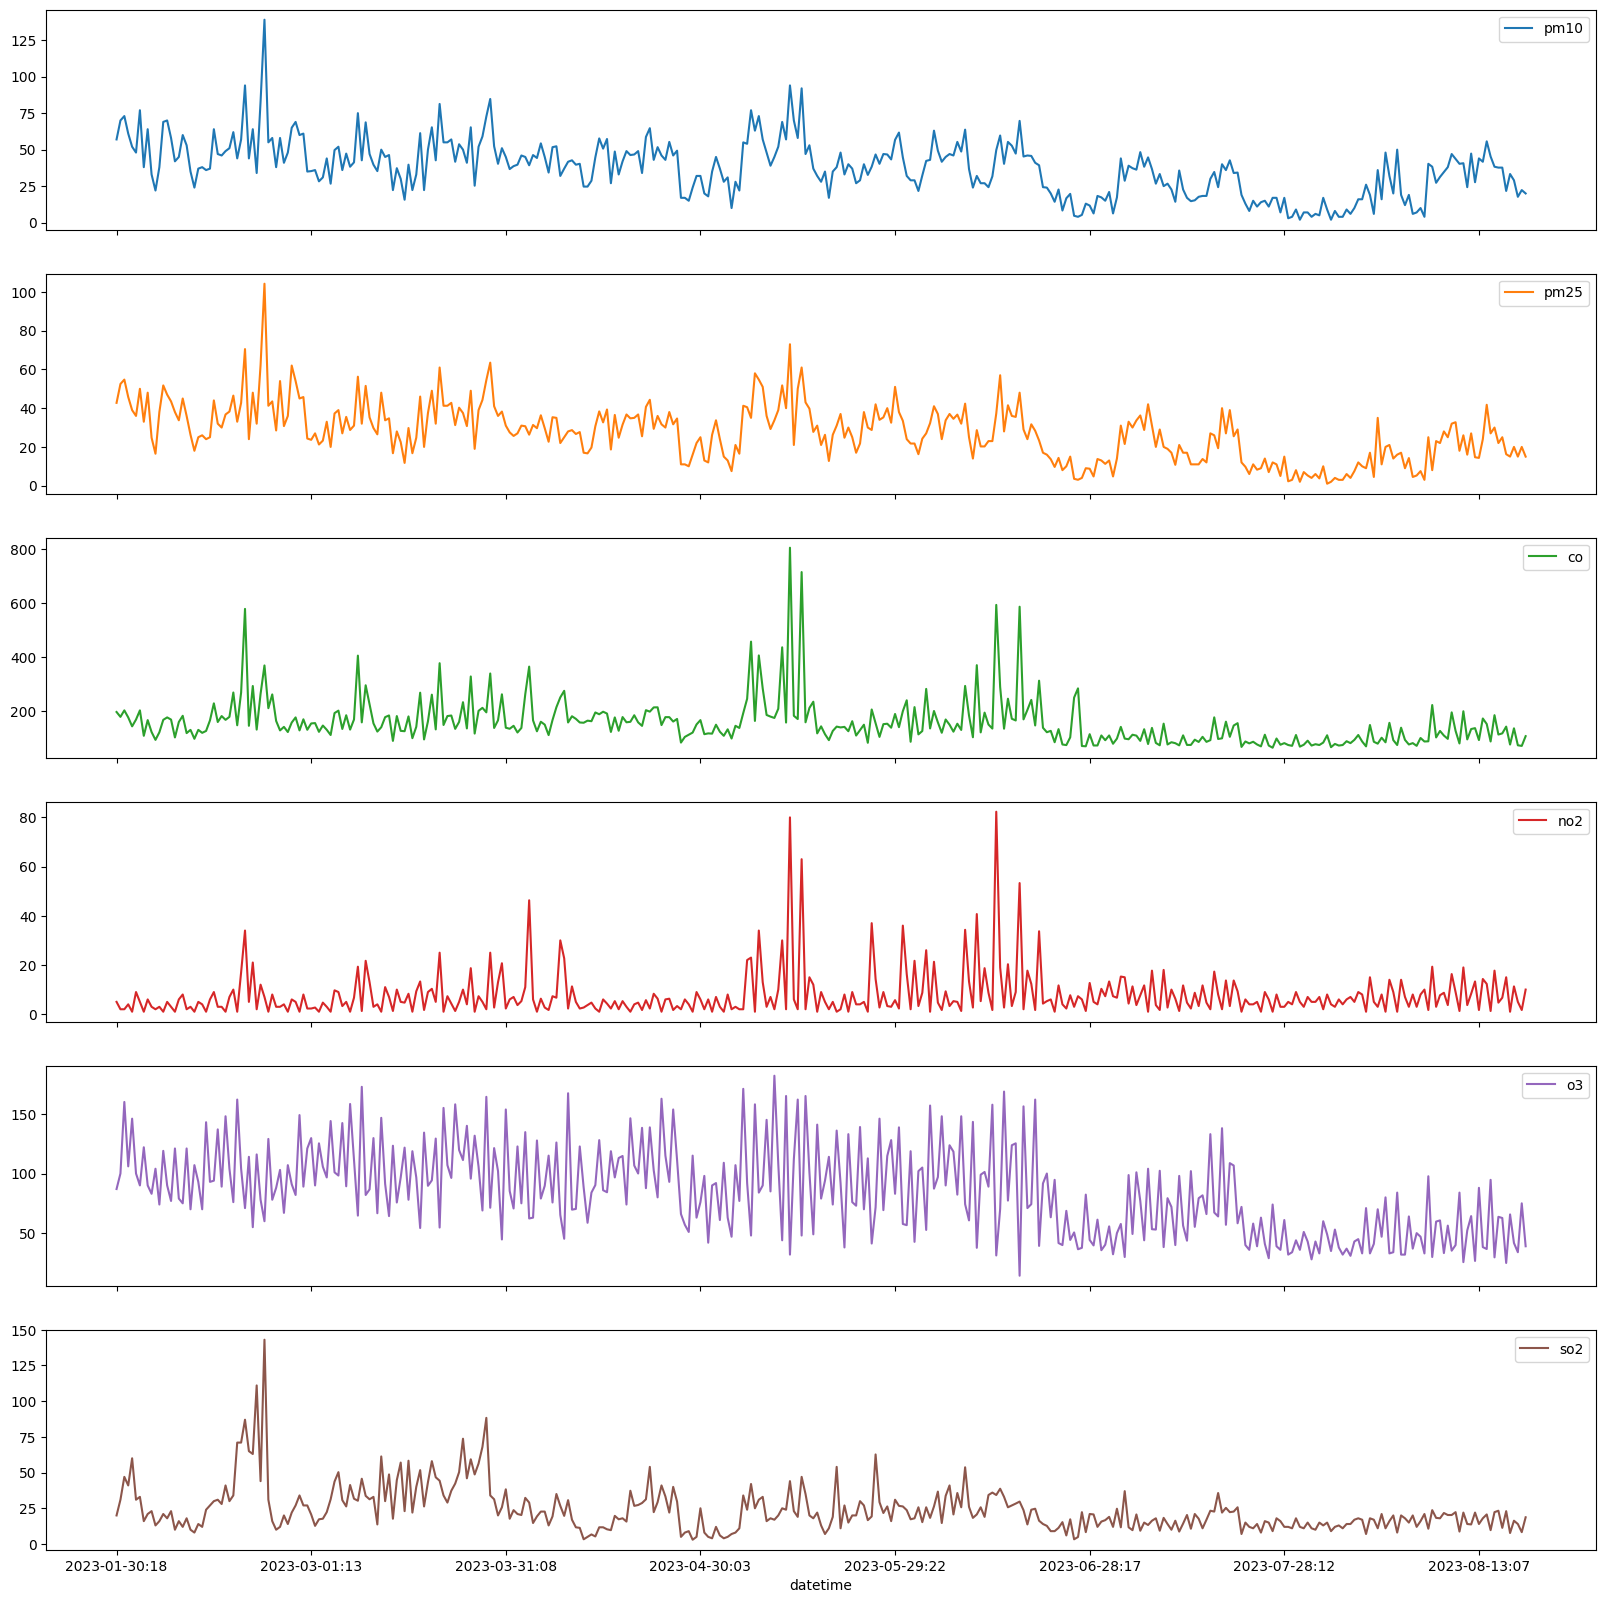

In [7]:
df_main .set_index('datetime')[['pm10', 'pm25', 'co', 'no2', 'o3','so2']][::15].plot (subplots=True, figsize=(20, 20),kind='line')

In [8]:
new = df_main["datetime"].str.split(":", n=1, expand=True)
df_main["date"] = new[0]
df_main["time"] = new[1]

# Combine "date" and "time" into a new "datetime" column
df_main['datetime'] = df_main.date + " " + df_main.time

# Drop "date" and "time" columns
df_main = df_main.drop(['date', 'time'], axis=1)  # Specify the 'axis' parameter


<ipython-input-8-1be7e3b8ebe9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["date"] = new[0]
<ipython-input-8-1be7e3b8ebe9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["time"] = new[1]
<ipython-input-8-1be7e3b8ebe9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [9]:
df_main

,datetime,pm10,pm25,co,no2,o3,so2,aqi
0,2023-01-30 18,57.0,42.75,198.0,5.0,87.0,20.0,153
1,2023-01-30 17,54.3,40.75,192.3,5.0,89.0,18.0,153
2,2023-01-30 16,51.7,38.75,186.7,5.0,91.0,16.0,153
3,2023-01-30 15,49.0,36.75,181.0,5.0,93.0,14.0,150
4,2023-01-30 14,46.3,34.75,172.7,3.7,99.3,12.3,137
...,...,...,...,...,...,...,...,...
5427,2023-08-05 22,15.0,12.00,89.0,7.7,37.3,17.7,50
5428,2023-08-05 21,16.0,12.00,92.0,8.0,39.0,18.0,87
5429,2023-08-05 20,18.0,13.50,100.3,9.0,39.0,18.3,104
5430,2023-08-05 19,20.0,15.00,108.7,10.0,39.0,18.7,80


In [10]:
df_main.datetime = pd.to_datetime(df_main.datetime)

In [11]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  5432 non-null   datetime64[ns]
 1   pm10      5432 non-null   float64       
 2   pm25      5432 non-null   float64       
 3   co        5432 non-null   float64       
 4   no2       5432 non-null   float64       
 5   o3        5432 non-null   float64       
 6   so2       5432 non-null   float64       
 7   aqi       5432 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 339.6 KB


In [12]:
df_main = df_main.set_index('datetime')

In [13]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5432 entries, 2023-01-30 18:00:00 to 2023-08-05 18:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm10    5432 non-null   float64
 1   pm25    5432 non-null   float64
 2   co      5432 non-null   float64
 3   no2     5432 non-null   float64
 4   o3      5432 non-null   float64
 5   so2     5432 non-null   float64
 6   aqi     5432 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 339.5 KB


In [14]:
df_main = df_main.interpolate()

In [15]:
df_main

,pm10,pm25,co,no2,o3,so2,aqi
datetime,,,,,,,
2023-01-30 18:00:00,57.0,42.75,198.0,5.0,87.0,20.0,153
2023-01-30 17:00:00,54.3,40.75,192.3,5.0,89.0,18.0,153
2023-01-30 16:00:00,51.7,38.75,186.7,5.0,91.0,16.0,153
2023-01-30 15:00:00,49.0,36.75,181.0,5.0,93.0,14.0,150
2023-01-30 14:00:00,46.3,34.75,172.7,3.7,99.3,12.3,137
...,...,...,...,...,...,...,...
2023-08-05 22:00:00,15.0,12.00,89.0,7.7,37.3,17.7,50
2023-08-05 21:00:00,16.0,12.00,92.0,8.0,39.0,18.0,87
2023-08-05 20:00:00,18.0,13.50,100.3,9.0,39.0,18.3,104


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [17]:
# Split a multivariate sequence into samples
def sequences(seq,data_in,data_out):
	A,B = list(), list()
	for i in range(len(seq)):
		# find the end of this pattern
		pattern_in = i + data_in
		pattern_out= pattern_in + data_out
		# check if we are beyond the dataset
		if pattern_out > len(seq):
			break
		# gather input and output parts of the pattern
		seq_in, seq_out = seq[i:pattern_in, :], seq[pattern_in:pattern_out, :]
		A.append(seq_in)
		B.append(seq_out)
	return array(A), array(B)

In [18]:
complete_dataset = len(df_main)

In [19]:
df_train = df_main[:int(complete_dataset*0.76)]

In [20]:
df_test = df_main[int(complete_dataset*0.76):complete_dataset]

In [21]:
normalize = MinMaxScaler()

In [22]:
df_train_normalize= normalize.fit_transform(df_train)

In [23]:
df_test_normalize = normalize.fit_transform(df_test)

In [24]:
df_train.shape

(4128, 7)

In [25]:
df_train.shape[0]/24

172.0

In [26]:
df_test.shape

(1304, 7)

In [27]:
df_test.shape[0]/24

54.333333333333336

In [28]:
data_in=6

In [29]:
data_out=3

In [30]:
x_train, y_train = sequences(df_train_normalize, data_in, data_out)

In [31]:
x_test, y_test = sequences(df_test_normalize, data_in, data_out)

In [32]:
columns= x_train.shape[2]

In [33]:
print(x_train[0])

[[0.38980617 0.33669355 0.13459621 0.04545455 0.43617021 0.0972973
  0.46779661]
 [0.37042355 0.32056452 0.12891326 0.04545455 0.44680851 0.08648649
  0.46779661]
 [0.35175879 0.30443548 0.12333001 0.04545455 0.45744681 0.07567568
  0.46779661]
 [0.33237617 0.28830645 0.11764706 0.04545455 0.46808511 0.06486486
  0.45762712]
 [0.31299354 0.27217742 0.10937188 0.03068182 0.50159574 0.05567568
  0.41355932]
 [0.29432879 0.25604839 0.10099701 0.01477273 0.5356383  0.04702703
  0.36610169]]


In [34]:

print(y_train[0])

[[0.27494616 0.23991935 0.09272183 0.         0.56914894 0.03783784
  0.38644068]
 [0.28930366 0.25201613 0.09371884 0.         0.56010638 0.03945946
  0.42033898]
 [0.30366116 0.33870968 0.09471585 0.         0.55159574 0.04162162
  0.35932203]]


In [35]:
columns

7

In [36]:
x_train.shape

(4120, 6, 7)

In [37]:
y_train.shape

(4120, 3, 7)

In [38]:
x_test.shape

(1296, 6, 7)

In [39]:
y_test.shape

(1296, 3, 7)

In [40]:
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Dropout

In [41]:
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RepeatVector, TimeDistributed, Dense

model = Sequential()
model.add(Bidirectional(LSTM(200, activation='relu', input_shape=(data_in, columns), return_sequences=True)))
model.add(Bidirectional(LSTM(200, activation='relu', return_sequences=False)))
model.add(RepeatVector(data_out))
model.add(Bidirectional(LSTM(200, activation='relu', return_sequences=True)))
model.add(TimeDistributed(Dense(columns)))


In [42]:
from tensorflow.keras import optimizers
epoch =75

model.compile(optimizer='adam', loss='mse',metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))


Epoch 1/75
129/129 [==============================] - 32s 152ms/step - loss: 0.0140 - mean_absolute_error: 0.0791 - val_loss: 0.0132 - val_mean_absolute_error: 0.0844
Epoch 2/75
129/129 [==============================] - 18s 141ms/step - loss: 0.0051 - mean_absolute_error: 0.0490 - val_loss: 0.0094 - val_mean_absolute_error: 0.0702
Epoch 3/75
129/129 [==============================] - 22s 169ms/step - loss: 0.0041 - mean_absolute_error: 0.0439 - val_loss: 0.0097 - val_mean_absolute_error: 0.0702
Epoch 4/75
129/129 [==============================] - 23s 178ms/step - loss: 0.0036 - mean_absolute_error: 0.0406 - val_loss: 0.0080 - val_mean_absolute_error: 0.0642
Epoch 5/75
129/129 [==============================] - 18s 142ms/step - loss: 0.0033 - mean_absolute_error: 0.0383 - val_loss: 0.0077 - val_mean_absolute_error: 0.0633
Epoch 6/75
129/129 [==============================] - 20s 152ms/step - loss: 0.0030 - mean_absolute_error: 0.0365 - val_loss: 0.0071 - val_mean_absolute_error: 0.059

In [43]:
future = model.predict_generator(x_test)

<ipython-input-43-8325dd556104>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  future = model.predict_generator(x_test)


In [44]:
print(future.shape)


(1296, 3, 7)


In [45]:
future= np.reshape(future, (1296*3, 7))

In [46]:
future = pd.DataFrame(future)

In [47]:
future= normalize.inverse_transform(future)

In [48]:
future = pd.DataFrame(future)

In [49]:
future

,0,1,2,3,4,5,6
0,18.941267,12.469868,125.495621,14.077432,54.644836,15.263554,112.353477
1,17.856367,11.926280,115.495598,12.373777,65.724922,14.942138,119.729446
2,16.633095,11.357114,101.374352,9.273847,79.634720,14.381714,124.343834
3,16.932600,11.314809,102.804283,10.034044,64.952065,14.219402,116.197960
4,15.070455,10.211553,92.716042,7.045183,81.198441,13.811851,111.018761
...,...,...,...,...,...,...,...
3883,16.059738,9.132854,91.431152,9.474612,40.849113,16.591679,60.060154
3884,16.655756,9.655103,93.359573,10.024046,44.409363,15.819102,65.113472
3885,16.650406,10.235280,88.156723,8.463520,38.805889,17.901245,72.135681
3886,17.053152,10.392884,89.358902,8.945099,42.138500,17.534412,76.342781


In [50]:
future.shape

(3888, 7)

In [51]:
y_test.shape

(1296, 3, 7)

In [52]:
actual = np.reshape(y_test, (1296*3, 7))

In [53]:
actual= pd.DataFrame(actual)

In [54]:
actual = normalize.inverse_transform(actual)

In [55]:
actual= pd.DataFrame(actual)

In [56]:
actual

,0,1,2,3,4,5,6
0,18.0,13.50,118.0,13.0,54.3,13.7,129.0
1,17.0,12.75,108.0,12.0,59.7,13.3,134.0
2,16.0,12.00,98.0,11.0,65.0,13.0,112.0
3,17.0,12.75,108.0,12.0,59.7,13.3,134.0
4,16.0,12.00,98.0,11.0,65.0,13.0,112.0
...,...,...,...,...,...,...,...
3883,18.0,13.50,100.3,9.0,39.0,18.3,104.0
3884,20.0,15.00,108.7,10.0,39.0,18.7,80.0
3885,18.0,13.50,100.3,9.0,39.0,18.3,104.0
3886,20.0,15.00,108.7,10.0,39.0,18.7,80.0


In [57]:
actual.shape

(3888, 7)

In [58]:
df_compare = pd.DataFrame()

In [59]:
df_compare['pm10'] = actual[0]
df_compare['pm10_pred'] = future[0]
df_compare['pm25'] = actual[1]
df_compare['pm25_pred'] = future[1]
df_compare['co'] = actual[2]
df_compare['co_pred'] = future[2]
df_compare['no2'] = actual[3]
df_compare['no2_pred'] = future[3]
df_compare['o3'] = actual[4]
df_compare['o3_pred'] =future[4]
df_compare['so2'] = actual[5]
df_compare['so2_pred'] = future[5]
df_compare['aqi'] = actual[6]
df_compare['aqi_pred'] = future[6]

In [60]:
df_compare

,pm10,pm10_pred,pm25,pm25_pred,co,co_pred,no2,no2_pred,o3,o3_pred,so2,so2_pred,aqi,aqi_pred
0,18.0,18.941267,13.50,12.469868,118.0,125.495621,13.0,14.077432,54.3,54.644836,13.7,15.263554,129.0,112.353477
1,17.0,17.856367,12.75,11.926280,108.0,115.495598,12.0,12.373777,59.7,65.724922,13.3,14.942138,134.0,119.729446
2,16.0,16.633095,12.00,11.357114,98.0,101.374352,11.0,9.273847,65.0,79.634720,13.0,14.381714,112.0,124.343834
3,17.0,16.932600,12.75,11.314809,108.0,102.804283,12.0,10.034044,59.7,64.952065,13.3,14.219402,134.0,116.197960
4,16.0,15.070455,12.00,10.211553,98.0,92.716042,11.0,7.045183,65.0,81.198441,13.0,13.811851,112.0,111.018761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,18.0,16.059738,13.50,9.132854,100.3,91.431152,9.0,9.474612,39.0,40.849113,18.3,16.591679,104.0,60.060154
3884,20.0,16.655756,15.00,9.655103,108.7,93.359573,10.0,10.024046,39.0,44.409363,18.7,15.819102,80.0,65.113472
3885,18.0,16.650406,13.50,10.235280,100.3,88.156723,9.0,8.463520,39.0,38.805889,18.3,17.901245,104.0,72.135681
3886,20.0,17.053152,15.00,10.392884,108.7,89.358902,10.0,8.945099,39.0,42.138500,18.7,17.534412,80.0,76.342781


<Axes: >

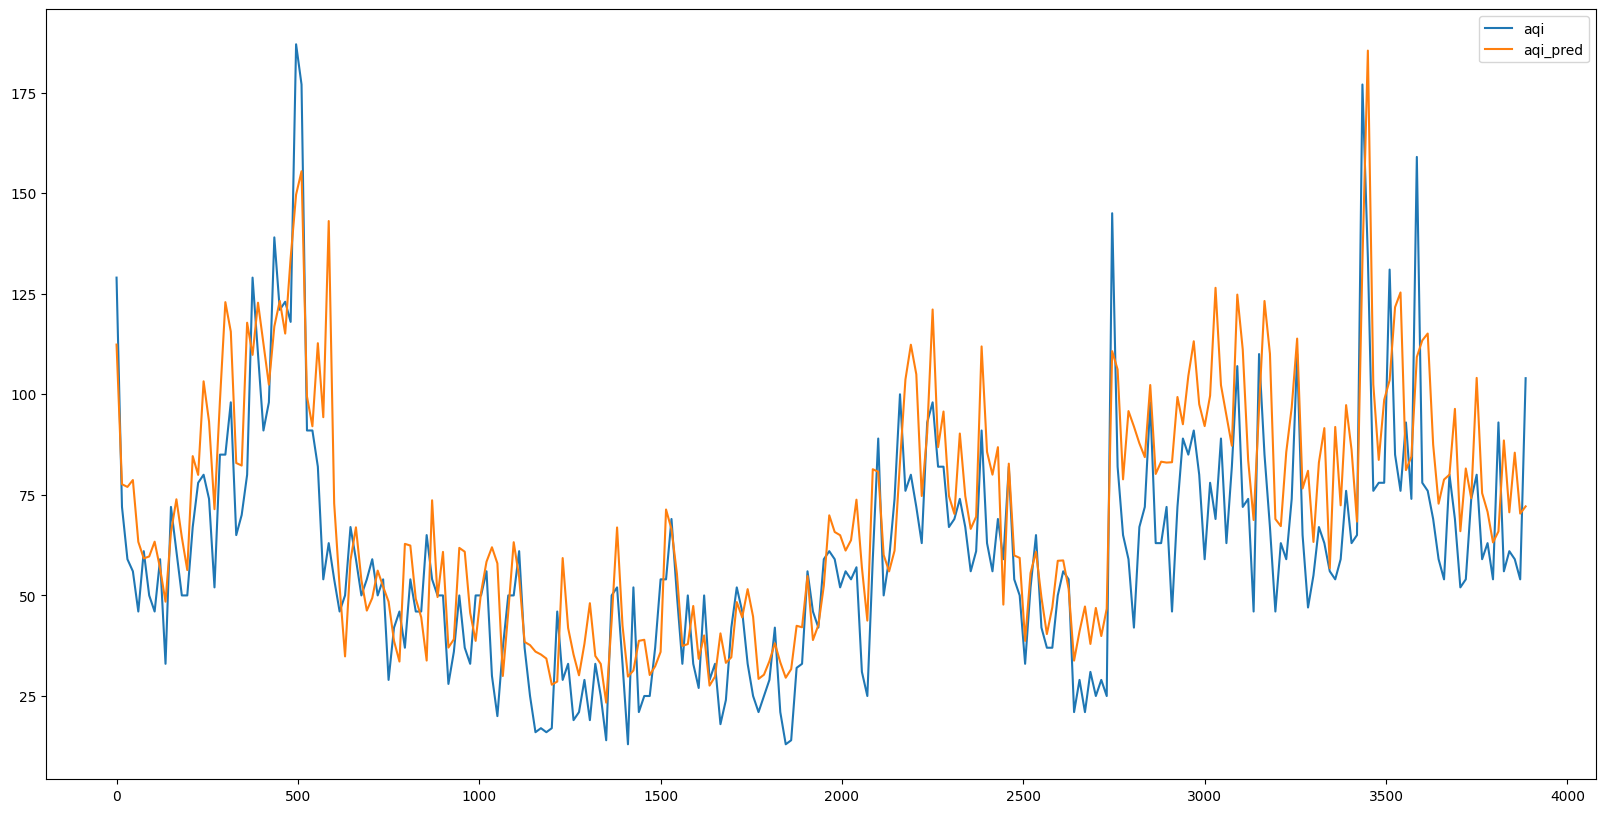

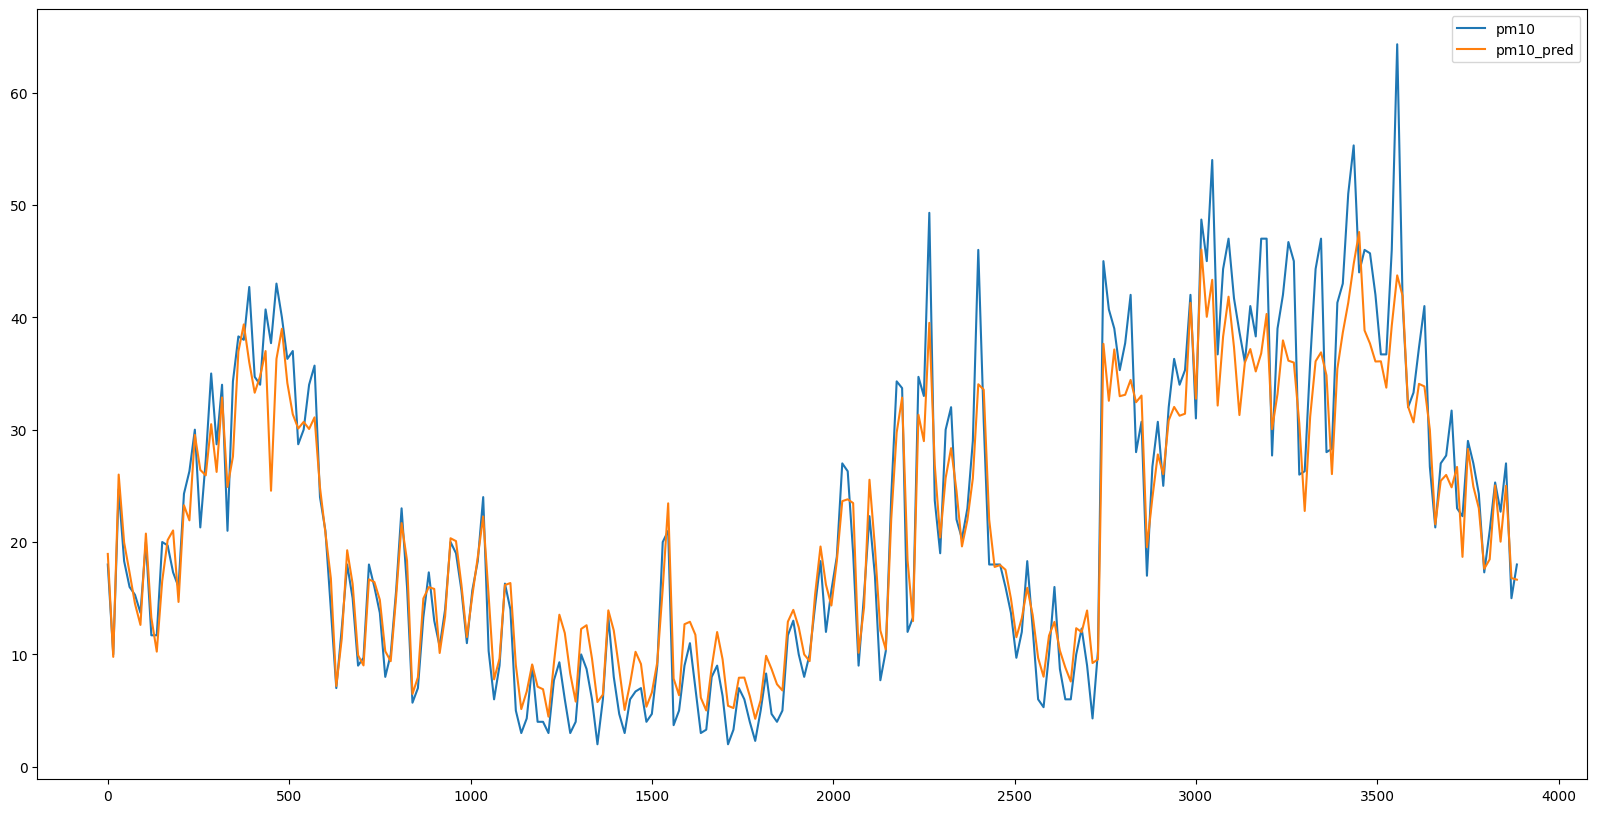

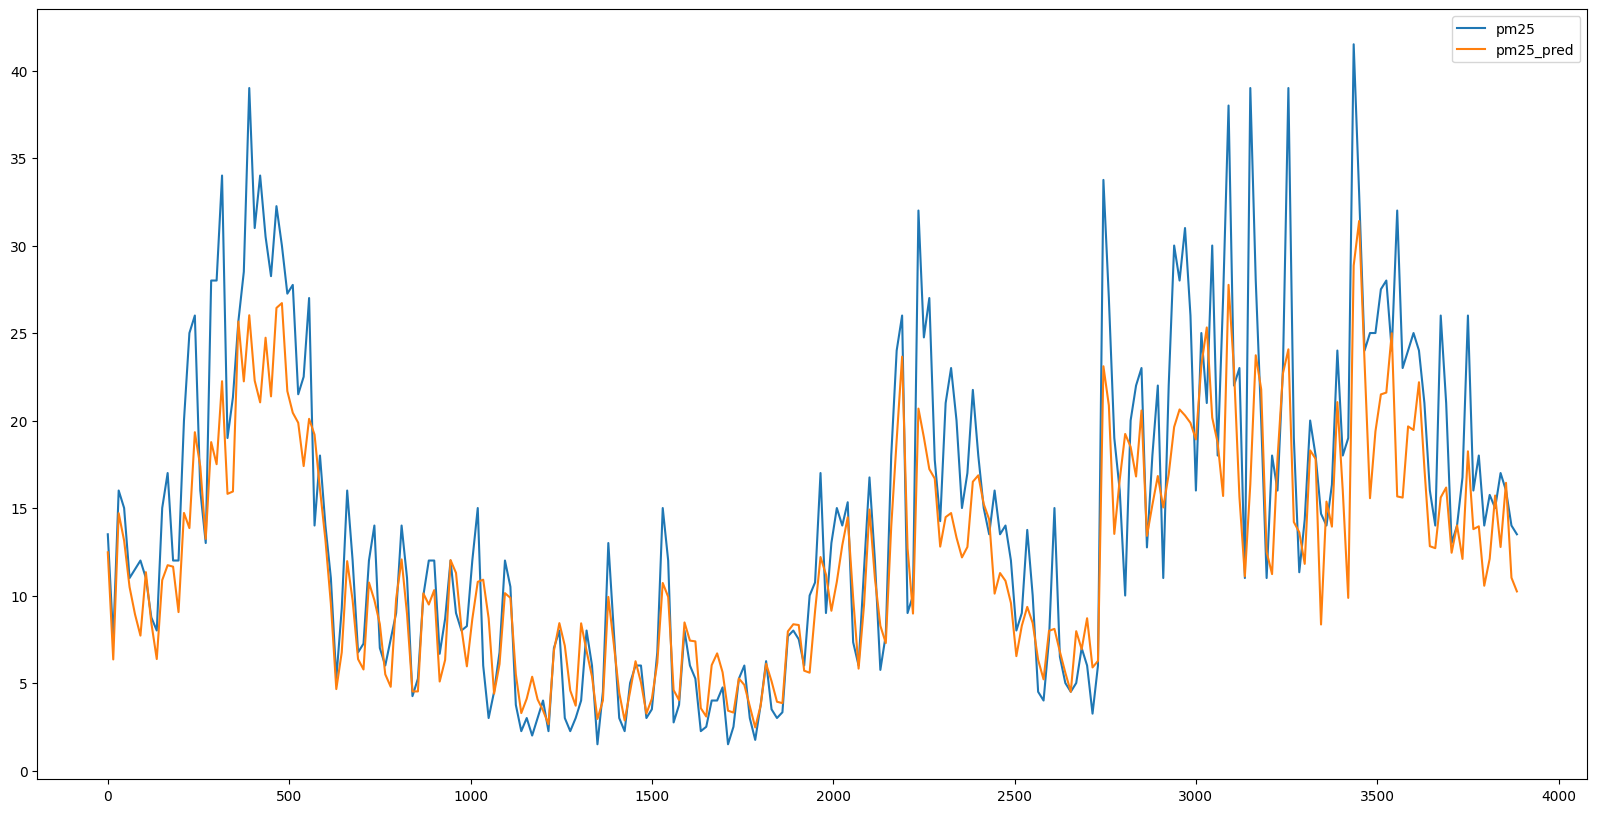

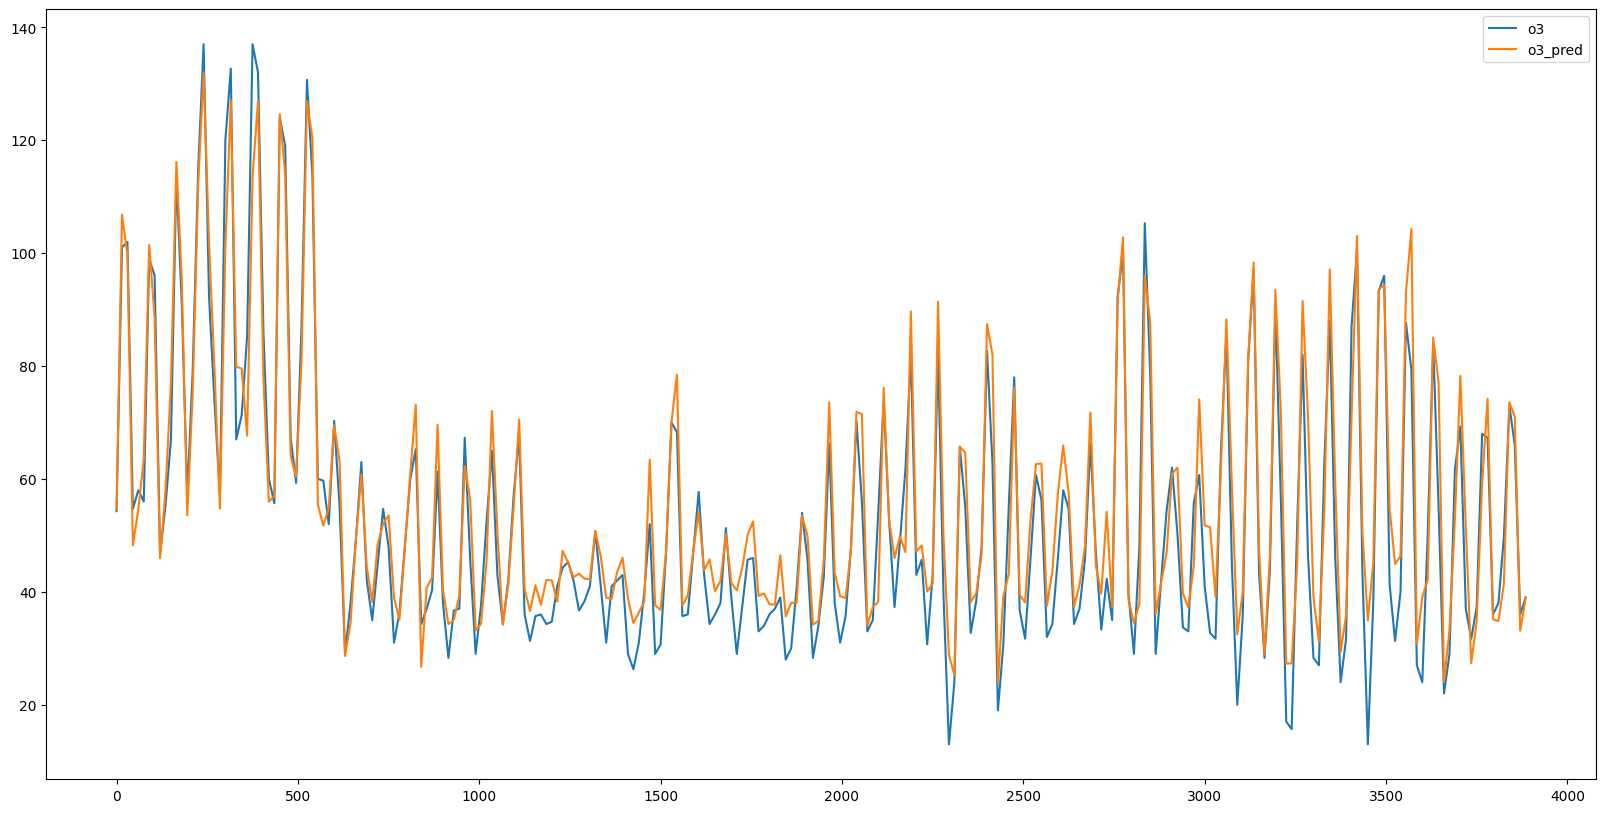

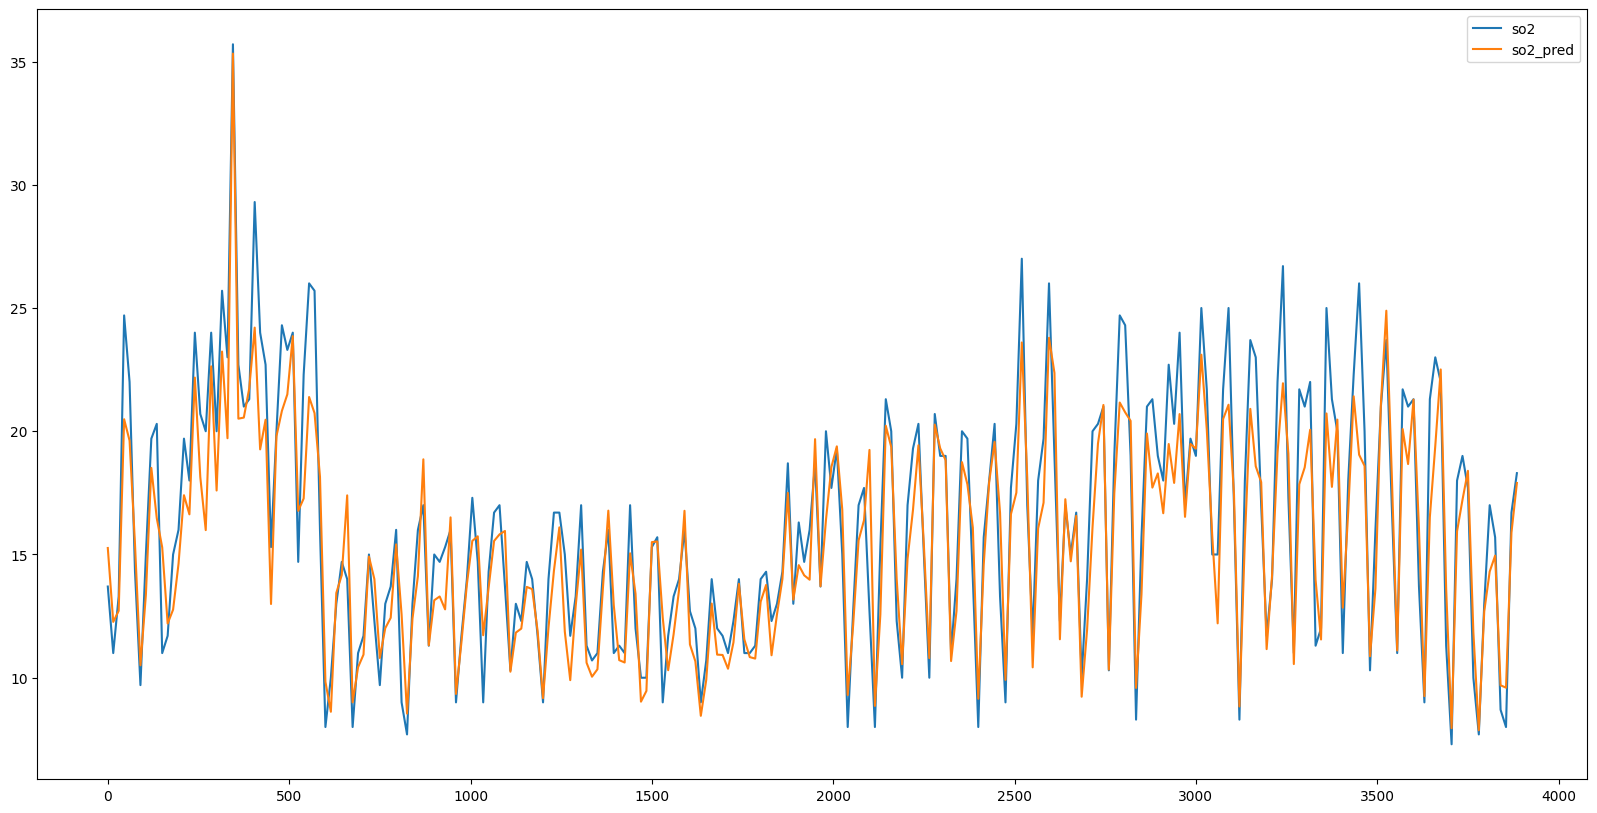

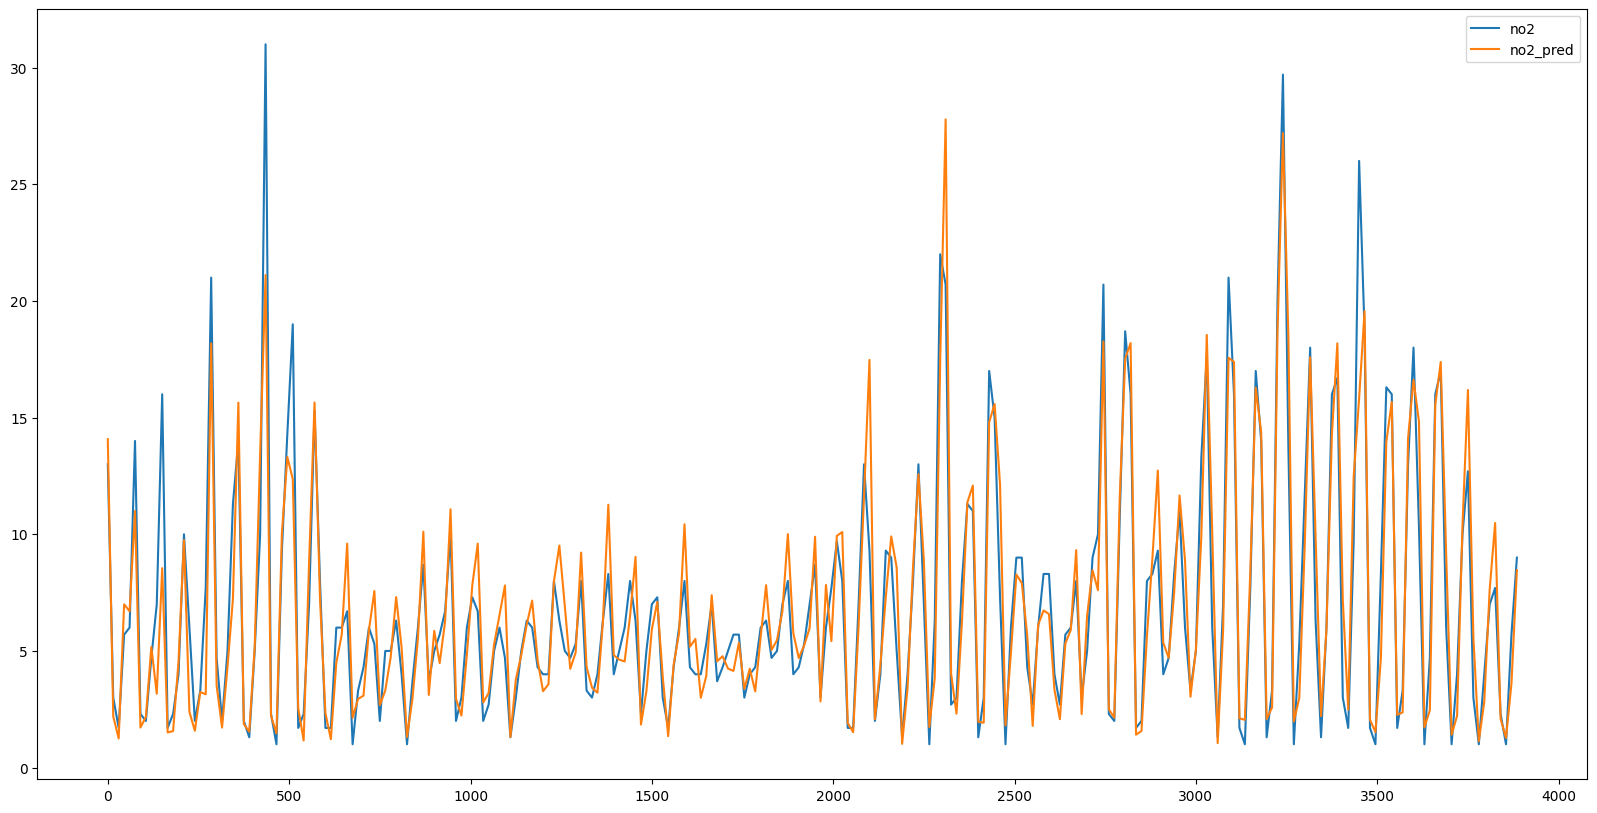

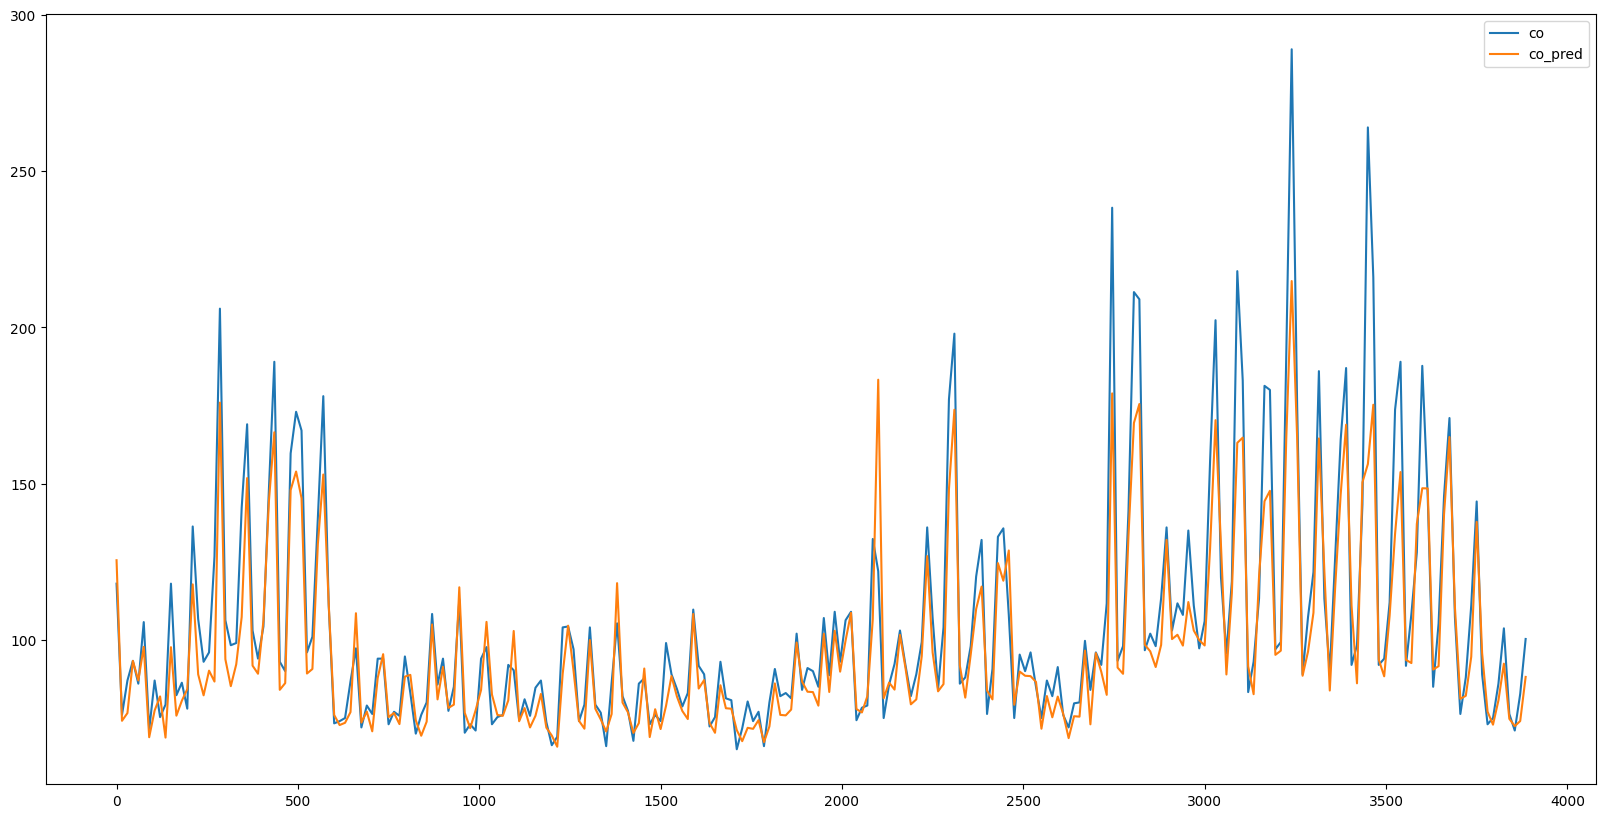

In [61]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,10)
mpl.rcParams['axes.grid'] = False
df_compare[['aqi', 'aqi_pred']][::15].plot()
df_compare[['pm10', 'pm10_pred']][::15].plot()
df_compare[['pm25', 'pm25_pred']][::15].plot()
df_compare[['o3', 'o3_pred']][::15].plot()
df_compare[['so2', 'so2_pred']][::15].plot()
df_compare[['no2', 'no2_pred']][::15].plot()
df_compare[['co', 'co_pred']][::15].plot()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score, explained_variance_score, max_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

indicator = ["aqi",'pm10', 'pm25', 'o3', 'so2', 'no2', 'co']
for i in indicator:
    rmse = mean_squared_error(df_compare[f'{i}'], df_compare[f'{i}_pred'], squared=False)
    mse = mean_squared_error(df_compare[f'{i}'], df_compare[f'{i}_pred'])
    mae = mean_absolute_error(df_compare[f'{i}'], df_compare[f'{i}_pred'])
    mape = mean_absolute_percentage_error(df_compare[f'{i}'], df_compare[f'{i}_pred'])


    print(f'{i} ----> RMSE: {rmse} ; MSE: {mse} ; MAE: {mae} ; MAPE: {mape}  \n')



aqi ----> RMSE: 24.99775886183406 ; MSE: 624.8879481144033 ; MAE: 19.644546300786022 ; MAPE: 0.4080962750544951  

pm10 ----> RMSE: 5.4152784022147475 ; MSE: 29.32524017349351 ; MAE: 3.9335449720361106 ; MAPE: 0.26708203359013377  

pm25 ----> RMSE: 5.484744916471234 ; MSE: 30.08242679875704 ; MAE: 3.7409383770173465 ; MAPE: 0.2961406206449686  

o3 ----> RMSE: 12.31366876736543 ; MSE: 151.62643851239088 ; MAE: 9.376082681383124 ; MAPE: 0.22071407064814794  

so2 ----> RMSE: 3.3305649715179912 ; MSE: 11.092663029502637 ; MAE: 2.3068928441393033 ; MAPE: 0.14024389767315618  

no2 ----> RMSE: 3.201191802595646 ; MSE: 10.247628957005562 ; MAE: 2.1399397124064925 ; MAPE: 0.4137704559921392  

co ----> RMSE: 22.75923985204689 ; MSE: 517.9829986429993 ; MAE: 13.703898770132184 ; MAPE: 0.11412466038820256  

